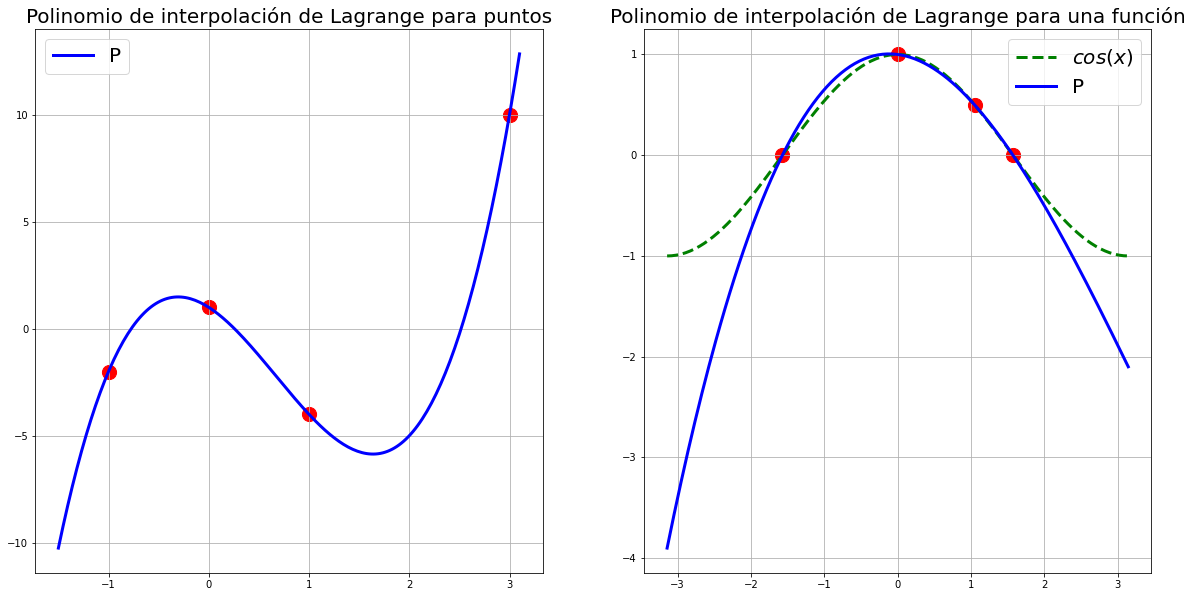

In [1]:
# Construcción del polinomio haciendolo todo 

import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(20,10))

# Figura izquierda
ax1 = axs[0]
x_coef = [-1, 0, 1, 3]
y_coef = [-2, 1, -4, 10]
x= np.linspace(-1.5, 3.1, 200)
P_expr = 2*x**3 - 4*x**2 - 3*x + 1

ax1.set_title('Polinomio de interpolación de Lagrange para puntos', fontsize=20)
ax1.scatter(x_coef, y_coef, s=200, c='r')
ax1.plot(x, P_expr, c='b', ls='-', lw='3', label = 'P')
ax1.grid()
ax1.legend(fontsize=20, loc='upper left')

# Figura derecha
ax2 = axs[1]
x_coef = [-np.pi/2, 0, np.pi/3, np.pi/2]
y_coef = [0, 1, 0.5, 0]
x= np.linspace(-np.pi, np.pi, 200)
f = np.cos(x)
P_expr = 2/np.pi*(x+np.pi/2)-21/(5*np.pi**2)*(x+np.pi/2)*x+6/(5*np.pi**3)*(x+np.pi/2)*x*(x-np.pi/3)

ax2.set_title('Polinomio de interpolación de Lagrange para una función', fontsize=20)
ax2.scatter(x_coef, y_coef, s=200, c='r')
ax2.plot(x, f, c='g', ls='--', lw='3', label = '$cos(x)$')
ax2.plot(x, P_expr, c='b', ls='-', lw='3', label = 'P')
ax2.grid()
ax2.legend(fontsize=20, loc='upper right')

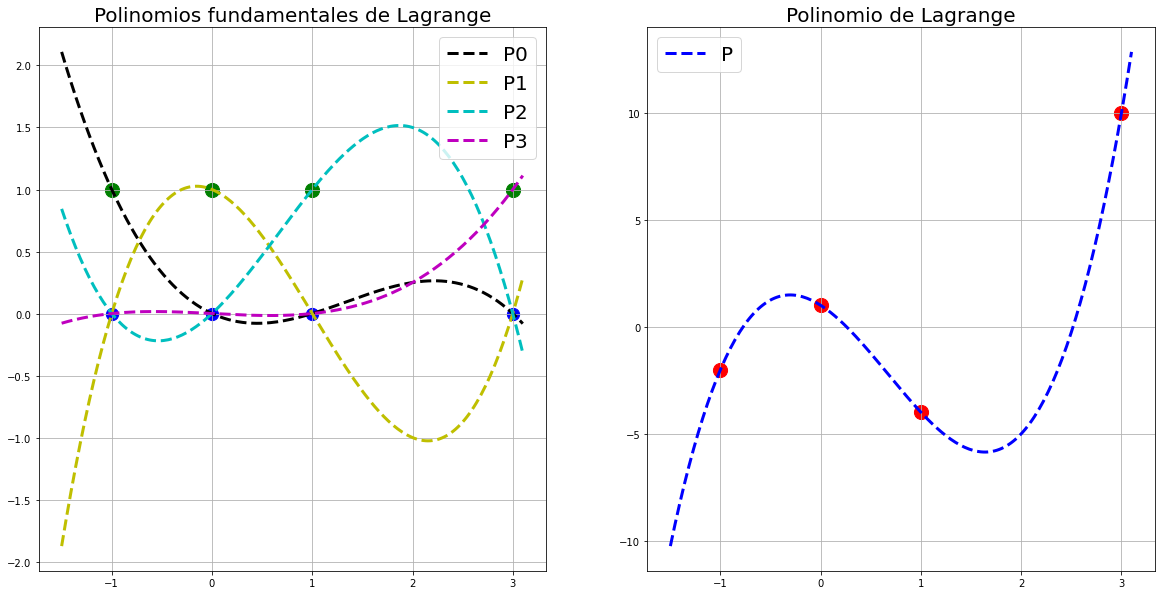

In [2]:
# Construcción por polinomios fundamentales
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(20,10))

x_coef = [-1, 0, 1, 3]
y_ceros = [0, 0, 0, 0]
y_unos = [1, 1, 1, 1]
y_coef = [-2, 1, -4, 10]

x= np.linspace(-1.5, 3.1, 200)

P0_expr = ( (x-x_coef[1])*(x-x_coef[2])*(x-x_coef[3]) ) / ( (x_coef[0]-x_coef[1])*(x_coef[0]-x_coef[2])*(x_coef[0]-x_coef[3]) )
P1_expr = ( (x-x_coef[0])*(x-x_coef[2])*(x-x_coef[3]) ) / ( (x_coef[1]-x_coef[0])*(x_coef[1]-x_coef[2])*(x_coef[1]-x_coef[3]) )
P2_expr = ( (x-x_coef[0])*(x-x_coef[1])*(x-x_coef[3]) ) / ( (x_coef[2]-x_coef[0])*(x_coef[2]-x_coef[1])*(x_coef[2]-x_coef[3]) )
P3_expr = ( (x-x_coef[0])*(x-x_coef[1])*(x-x_coef[2]) ) / ( (x_coef[3]-x_coef[0])*(x_coef[3]-x_coef[1])*(x_coef[3]-x_coef[2]) )

P_expr = y_coef[0]*P0_expr + y_coef[1]*P1_expr + y_coef[2]*P2_expr + y_coef[3]*P3_expr

# Figura izquierda
ax1 = axs[0]
ax1.set_title('Polinomios fundamentales de Lagrange', fontsize=20)
ax1.scatter(x_coef, y_ceros, s=150, c='b')
ax1.scatter(x_coef, y_unos, s=200, c='g')
ax1.plot(x, P0_expr, c='black', ls='--', lw='3', label = 'P0')
ax1.plot(x, P1_expr, c='y', ls='--', lw='3', label = 'P1')
ax1.plot(x, P2_expr, c='c', ls='--', lw='3', label = 'P2')
ax1.plot(x, P3_expr, c='m', ls='--', lw='3', label = 'P3')
ax1.grid()
ax1.legend(fontsize=20, loc='upper right')

# Figura derecha
ax2 = axs[1]
ax2.set_title("Polinomio de Lagrange", fontsize=20)
ax2.scatter(x_coef, y_coef, s=200, c='r')
ax2.plot(x, P_expr, c='b', ls='--', lw='3', label = 'P')
ax2.grid()
ax2.legend(fontsize=20, loc='upper left')

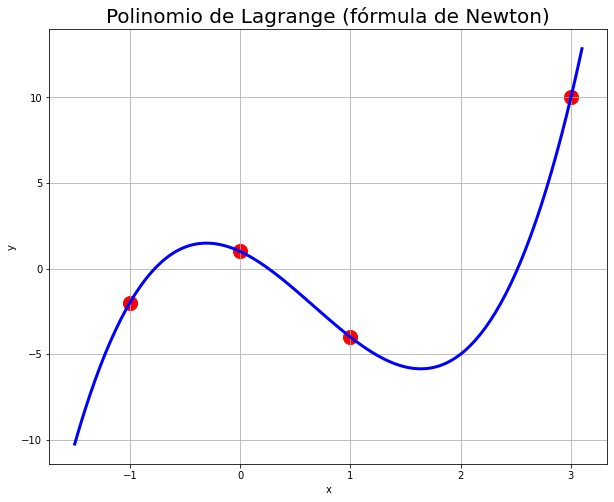

In [3]:
# Construcción del polinomio por diferencias divididas
import numpy as np
import matplotlib.pyplot as plt

def newton_poly(coef, x_data, x):
    # evaluamos el polinomio de Lagrange, construido con la 
    # tabla de diferencias divididas, en el punto x
    # in: 
    #    coef ---> primera fila de la tabla de diferencias divididas
    #    x_data -> valores de x_i
    #    x ------> punto en el que queremos evaluar el polinomio 
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

x_coef = [-1, 0, 1, 3]
y_coef = [-2, 1, -4, 10]

x= np.linspace(-1.5, 3.1, 200)

n = len(x_coef)
coef = np.zeros([n, n])
# La primera columna serán los datos en y
coef[:,0] = y_coef

# Necesitamos un doble bucle para crear la tabla de diferencias divididas
for j in range(1,n):
    for i in range(n-j):
        coef[i,j] = (coef[i+1,j-1] - coef[i,j-1]) / (x_coef[i+j]-x_coef[i])

# evaluamos el polinomio según la function definida al principio
P_expr = newton_poly(coef[0,:],x_coef,x)

# dibujamos el resultado
fig = plt.figure(figsize = (10,8))
plt.scatter(x_coef, y_coef, s=200, c='r')
plt.plot(x, P_expr, 'b', lw='3')
plt.title('Polinomio de Lagrange (fórmula de Newton)', fontsize=20)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()